In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

In [2]:
# read from csv files

datapath=pl.Path("../csvdata")

file_list=[]
dfs=[]
for x in datapath.glob("*H.csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading 110kVChangLiu1-H.csv
Reading 110kVChangLiu3-H.csv
Reading 35kVJiangChuan4-H.csv
Reading 110kVChangLiu4-H.csv
Reading 110kVJiangChuan3-H.csv
Reading 110kVJiangChuan2-H.csv
Reading 10kVWanKe2-H.csv
Reading 110kVChangLiu2-H.csv
Reading 110kVJiangChuan1-H.csv
Reading 35kVJiangChuan5-H.csv
Reading 10kVQinZhou4-H.csv
Reading 10kVQinZhou3-H.csv
Reading 35kVKunYang1-H.csv
Reading 10kVWanKe1-H.csv
Reading 10kVKunYang3-H.csv


In [3]:
f.columns

Index([' KunYang3 - Min[Va H1] (V)', ' KunYang3 - Avg[Va H1] (V)',
       ' KunYang3 - Max[Va H1] (V)', ' KunYang3 - Min[Vb H1] (V)',
       ' KunYang3 - Avg[Vb H1] (V)', ' KunYang3 - Max[Vb H1] (V)',
       ' KunYang3 - Min[Vc H1] (V)', ' KunYang3 - Avg[Vc H1] (V)',
       ' KunYang3 - Max[Vc H1] (V)', ' KunYang3 - Min[Ia H1] (A)',
       ...
       ' KunYang3 - Max[Vc H25] (V)', ' KunYang3 - Min[Ia H25] (A)',
       ' KunYang3 - Avg[Ia H25] (A)', ' KunYang3 - Max[Ia H25] (A)',
       ' KunYang3 - Min[Ib H25] (A)', ' KunYang3 - Avg[Ib H25] (A)',
       ' KunYang3 - Max[Ib H25] (A)', ' KunYang3 - Min[Ic H25] (A)',
       ' KunYang3 - Avg[Ic H25] (A)', ' KunYang3 - Max[Ic H25] (A)'],
      dtype='object', length=450)

In [4]:
tr_data=DataFrame()
i=0
for df in dfs:
    for c in df.columns:
        if c.find("Avg[Va H3]")!=-1:
            print (c)
            tr_data[c]=df[c]
            i+=1
print(i)

 Changliu1 - Avg[Va H3] (V)
 Changliu3 - Avg[Va H3] (V)
 JiangChuan4 - Avg[Va H3] (V)
 Changliu4 - Avg[Va H3] (V)
 JiangChuan3 - Avg[Va H3] (V)
 JiangChuan2 - Avg[Va H3] (V)
 WanKe2 - Avg[Va H3] (V)
 Changliu2 - Avg[Va H3] (V)
 JiangChuan1 - Avg[Va H3] (V)
 JiangChuan5 - Avg[Va H3] (V)
 QinZhou4 - Avg[Va H3] (V)
 QinZhou3 - Avg[Va H3] (V)
 KunYang1 - Avg[Va H3] (V)
 WanKe1 - Avg[Va H3] (V)
 KunYang3 - Avg[Va H3] (V)
15


In [5]:
train_data=tr_data.dropna()

In [6]:
len(train_data)

3299

In [7]:
train_data=train_data.dropna(axis=1)

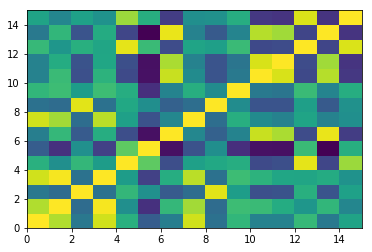

In [8]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

In [9]:
train_data.describe()

,Changliu1 - Avg[Va H3] (V),Changliu3 - Avg[Va H3] (V),JiangChuan4 - Avg[Va H3] (V),Changliu4 - Avg[Va H3] (V),JiangChuan3 - Avg[Va H3] (V),JiangChuan2 - Avg[Va H3] (V),WanKe2 - Avg[Va H3] (V),Changliu2 - Avg[Va H3] (V),JiangChuan1 - Avg[Va H3] (V),JiangChuan5 - Avg[Va H3] (V),QinZhou4 - Avg[Va H3] (V),QinZhou3 - Avg[Va H3] (V),KunYang1 - Avg[Va H3] (V),WanKe1 - Avg[Va H3] (V),KunYang3 - Avg[Va H3] (V)
count,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000
mean,46.433290,41.270690,26.029830,46.616451,57.763487,71.804985,9.179380,51.561151,69.958332,16.093489,10.894883,10.703246,20.140973,8.101914,11.048508
std,17.205120,18.288598,19.963262,18.190312,27.578694,18.006364,4.152513,14.217452,55.281121,4.908761,4.091967,3.000456,8.583879,3.416894,2.354653
min,6.494638,2.714374,1.658077,7.201819,5.192605,24.164274,1.593265,15.772482,4.080633,3.689660,1.551557,1.787854,4.615591,1.547993,5.165754
25%,33.947510,27.468232,15.272182,32.616882,38.417458,59.828953,5.923898,41.863611,34.133839,12.664459,7.712622,8.535328,13.912220,5.339250,9.565337
50%,46.015984,39.678368,20.344063,44.849205,52.506844,68.595085,8.278029,50.604393,51.441067,16.387505,10.318714,10.483410,19.060085,7.397362,10.720626
75%,58.257740,53.134056,27.353436,58.031200,68.953323,84.778084,12.241568,59.846865,86.705025,19.336660,14.011926,12.943670,24.438532,10.633447,12.672326
max,103.680977,99.992325,95.360336,107.038445,138.177231,124.027405,20.931952,100.712166,250.481308,32.469051,23.325956,20.067720,45.598892,18.284916,17.709082


In [12]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(train_data,test_size=0.2,random_state=0)

In [13]:
MAX= train.max()
MIN = train.min()

In [14]:
train_s=(train-MIN)/(MAX-MIN)
test_s=(test-MIN)/(MAX-MIN)

In [15]:
train_s=train_s.fillna(0)
test_s=test_s.fillna(0)

In [16]:
#  generate X_train,Y_train,X_test,Y_test for all target features
X_train=train_s.copy();Y_train=DataFrame()

for c in train_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_train[c]=train_s[c]
        X_train=X_train.drop(c,axis=1)

        
X_test=test_s.copy();Y_test=DataFrame()

for c in test_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_test[c]=test_s[c]
        X_test=X_test.drop(c,axis=1)

In [17]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras


model = Sequential()

model.add(Dense(28, input_dim=14,kernel_initializer="normal"))
model.add(Activation('relu'))
model.add(Dense(7, activation='relu',kernel_initializer="normal"))
model.add(Dense(1, activation='linear',kernel_initializer="normal"))

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.02))

In [109]:
model.fit(X_train, Y_train, epochs=30,batch_size=30,
          shuffle=True,verbose=2,validation_split=0.2) 

Train on 2111 samples, validate on 528 samples
Epoch 1/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 2/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 3/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 4/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 5/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 6/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 7/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 8/30
 - 0s - loss: 0.0020 - val_loss: 0.0025
Epoch 9/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 10/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 11/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 12/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 13/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 14/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 15/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 16/30
 - 0s - loss: 0.0021 - val_loss: 0.0024
Epoch 17/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 18/30
 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 19/30
 - 0s - loss: 

In [110]:
#((model.predict(X_test)-Y_test)/Y_test)

In [111]:
((model.predict(X_test)-Y_test)).describe()

,WanKe1 - Avg[Va H3] (V)
count,660.000000
mean,0.004365
std,0.047662
min,-0.154416
25%,-0.027088
50%,0.005878
75%,0.036440
max,0.134067


In [112]:
c=Y_test.columns
R= pd.DataFrame(model.predict(X_test),columns=['V_pred'])
R.index = Y_test.index
R= R.join(Y_test)
R=  R*(MAX[c]-MIN[c]).values[0]+MIN[c].values[0]


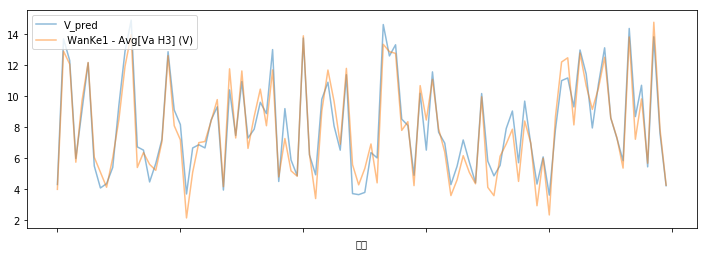

In [113]:
R_show=R.iloc[200:300,:]

import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

R_show.plot(alpha =0.5,figsize = (12,4))

In [116]:
R["diff"]=(R["V_pred"]-R[c[0]])
R["diff_ptg"]=(R["V_pred"]-R[c[0]])/R[c[0]]

In [117]:
R.describe()

,V_pred,WanKe1 - Avg[Va H3] (V),diff,diff_ptg
count,660.000000,660.000000,660.000000,660.000000
mean,8.159778,8.086730,0.073050,0.027140
std,3.359703,3.420094,0.797708,0.149476
min,3.071855,2.049639,-2.584443,-0.362251
25%,5.503675,5.259024,-0.453375,-0.056051
50%,7.291238,7.261664,0.098382,0.010767
75%,10.852704,10.923208,0.609898,0.084945
max,17.516537,18.121792,2.243876,0.897765


In [118]:
(R.diff_ptg.quantile(0.05),R.diff_ptg.quantile(0.95))

(-0.17324932032344928, 0.28578145360210033)

In [119]:
R[:6]

,V_pred,WanKe1 - Avg[Va H3] (V),diff,diff_ptg
时间,,,,
2018-02-02 05:24:00,17.396671,17.429249,-0.032578,-0.001869
2018-02-01 01:42:00,12.469651,12.143599,0.326053,0.026850
2018-02-02 20:36:00,5.575743,3.990097,1.585646,0.397395
2018-02-07 13:15:00,4.615371,4.891519,-0.276147,-0.056454
2018-02-03 09:27:00,8.023999,8.185981,-0.161982,-0.019788
2018-02-05 09:48:00,5.653460,5.843438,-0.189978,-0.032511


In [120]:
R.corr()

,V_pred,WanKe1 - Avg[Va H3] (V),diff,diff_ptg
V_pred,1.000000,0.972469,0.042330,-0.078595
WanKe1 - Avg[Va H3] (V),0.972469,1.000000,-0.191659,-0.286853
diff,0.042330,-0.191659,1.000000,0.898836
diff_ptg,-0.078595,-0.286853,0.898836,1.000000


In [121]:
train_data.corr()[c[0]].sort_values()

 JiangChuan2 - Avg[Va H3] (V)   -0.304433
 KunYang3 - Avg[Va H3] (V)      -0.107495
 KunYang1 - Avg[Va H3] (V)      -0.035731
 JiangChuan3 - Avg[Va H3] (V)   -0.030237
 JiangChuan4 - Avg[Va H3] (V)    0.033242
 JiangChuan1 - Avg[Va H3] (V)    0.060616
 Changliu1 - Avg[Va H3] (V)      0.222970
 Changliu2 - Avg[Va H3] (V)      0.267236
 JiangChuan5 - Avg[Va H3] (V)    0.285556
 Changliu4 - Avg[Va H3] (V)      0.491149
 Changliu3 - Avg[Va H3] (V)      0.551992
 QinZhou3 - Avg[Va H3] (V)       0.813332
 QinZhou4 - Avg[Va H3] (V)       0.852510
 WanKe2 - Avg[Va H3] (V)         0.956145
 WanKe1 - Avg[Va H3] (V)         1.000000
Name:  WanKe1 - Avg[Va H3] (V), dtype: float64

In [122]:
model.save("model_h5/M_VH3.h5")

In [123]:
test[c][:6]

,WanKe1 - Avg[Va H3] (V)
时间,
2018-02-02 05:24:00,17.429249
2018-02-01 01:42:00,12.143599
2018-02-02 20:36:00,3.990097
2018-02-07 13:15:00,4.891519
2018-02-03 09:27:00,8.185981
2018-02-05 09:48:00,5.843438


In [124]:
R[c][:6]

,WanKe1 - Avg[Va H3] (V)
时间,
2018-02-02 05:24:00,17.429249
2018-02-01 01:42:00,12.143599
2018-02-02 20:36:00,3.990097
2018-02-07 13:15:00,4.891519
2018-02-03 09:27:00,8.185981
2018-02-05 09:48:00,5.843438


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f803c069588>]],
      dtype=object)

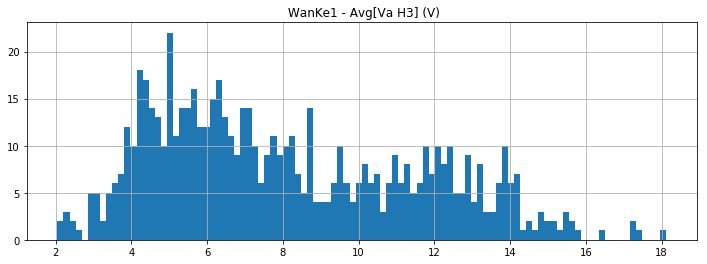

In [128]:
R[c].hist(bins=100)

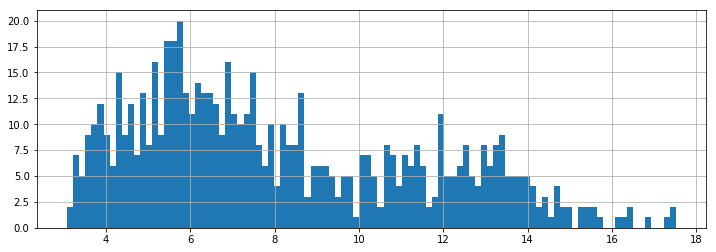

In [129]:
R['V_pred'].hist(bins=100)

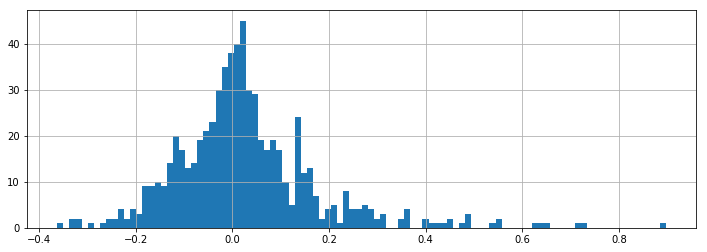

In [125]:
R.diff_ptg.hist(bins=100)